<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

Classification is a problem in which we say that whether one thing is something or not out of two options ins case of binary
and many options in case of multiple.options

# Architecture of classificatio problem
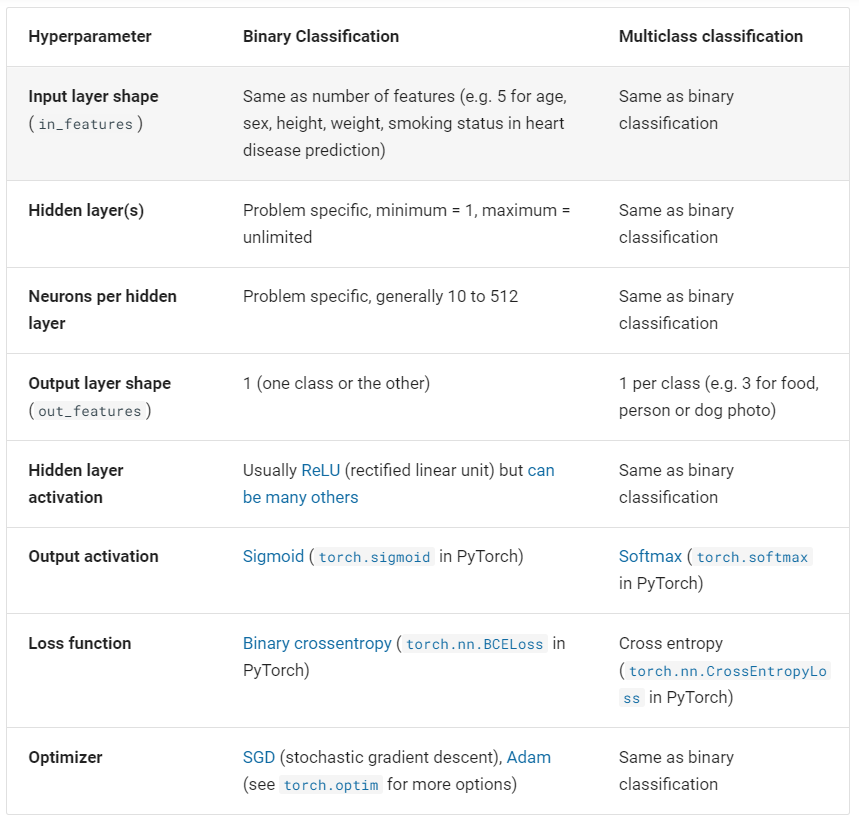

In [2]:
## 1. Make Classification data and get it ready
import sklearn

In [3]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples=1000
# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [4]:
len(X),len(y)

(1000, 1000)

In [5]:
print(f'first five samples of X:{X[:5]}')
print(f'first five samples of y:{y[:5]}')

first five samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five samples of y:[1 1 1 1 0]


In [6]:
# Make a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                     'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


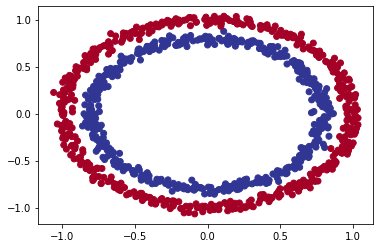

In [7]:
# Visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:**
The data we are working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [8]:
X.shape,y.shape 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of feature and labels
X_sample=X[0]
y_sample=y[0]
print(f'Values of one sample of X:{X_sample} and the same for y:{y_sample}')
print(f'Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}')


Values of one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### Turning data into tensors and create train and test split

In [10]:
# Import data into tensors
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [11]:
X.dtype

torch.float32

In [12]:
torch.manual_seed(42)

In [13]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,test_size=0.2,
                                               random_state=42)# 0.2 means 20 percent of the data will beused for testing


In [14]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model
let us build a model to classify our red and blue dots

To do so, we want to:
1. Setup the device agnostic code so our model run on acclerator(GPU )if there is one avilable
2. Construct the model(by subclassing nn.Module)
3. Defining a loss function and optimizer
4. Create the training and testing loop

In [15]:
# Import PyTorch and nn
import torch
from torch import nn

# Make a device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now we have setup device agnostic code let us create a model that:

1. Subclasses `nn.Module`(almost all models in Pytorch subclasses it)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass(or forward computation)
4. Instantiate an instnace of our model class and send it to the target `device`

In [21]:
from sklearn import datasets
# Constructing the model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create two nn.linear layer capable of handling our data
    self.layer_1=nn.Linear(in_features=2,
                           out_features=5)# takes in 2 features and upscale it to 5
    self.layer_2=nn.Linear(in_features=5,
                           out_features=1)# takes in 5 features and outputs 1
  # 3. Define the forward method that outlines the forward path        
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x-> layer 1 -> layer 2
# 4. Instantite an instance of our model and send it to our target device
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Lset us replicate the model above using nn.sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
# Make some predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
  print(f'length of untrained preds:{len(untrained_preds)},shape:{untrained_preds.shape}')
  print(f'length of test samples:{len(X_test)},Shape:{X_test.shape}')
  print(f'\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}')
  print(f'\nFirst 10 labels:\n{y_test[:10]}')

length of untrained preds:200,shape:torch.Size([200, 1])
length of test samples:200,Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
